<a href="https://colab.research.google.com/github/2303A52097/Generative_AI_2025/blob/main/2303A52105_Week07_Assignment_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment-7.2

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.6429 - loss: 0.6593 - val_accuracy: 0.6234 - val_loss: 0.6529
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7039 - loss: 0.5914 - val_accuracy: 0.6558 - val_loss: 0.6280
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7485 - loss: 0.5450 - val_accuracy: 0.6688 - val_loss: 0.6139
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7560 - loss: 0.5220 - val_accuracy: 0.6818 - val_loss: 0.5993
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7674 - loss: 0.5225 - val_accuracy: 0.6753 - val_loss: 0.5890
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7460 - loss: 0.5309 - val_accuracy: 0.7013 - val_loss: 0.5732
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7450 - loss: 0.5172 - val_accuracy: 0.7208 - val_loss: 0.5726
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7725 - loss: 0.4898 - val_accuracy: 0.

Training Accuracy: 0.9250814318656921, Testing Accuracy: 0.6883116960525513
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
              precision    recall  f1-score   support

           0       0.76      0.75      0.76        99
           1       0.56      0.58      0.57        55

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



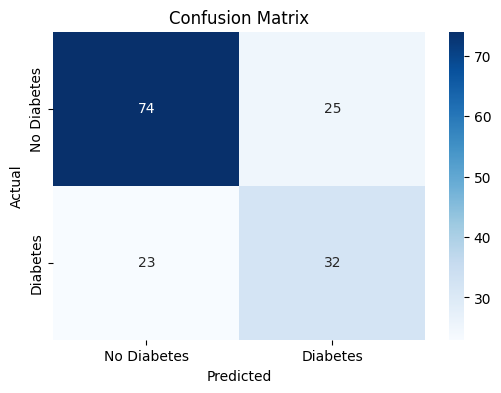

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction for example features: No Diabetes


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
df = pd.read_csv(url, header=None)
df.columns = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
              'bmi', 'diabetespedigree', 'age', 'outcome']

X = df.drop(columns=['outcome'])
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(10, activation='tanh'),
    Dense(15, activation='tanh'),
    Dense(20, activation='tanh'),
    Dense(10, activation='tanh'),
    Dense(5, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training Accuracy: {train_acc}, Testing Accuracy: {test_acc}')

model.save('diabetes_model.h5')

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def predict_diabetes(features):
    loaded_model = keras.models.load_model('diabetes_model.h5')
    features = scaler.transform([features])
    return (loaded_model.predict(features)[0][0] > 0.5).astype(int)

example_features = X_test[0]
prediction = predict_diabetes(example_features)
print(f'Prediction for example features: {"Diabetes" if prediction else "No Diabetes"}')
